In [19]:
%load_ext autoreload
%autoreload 2

from datetime import datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from analyze_tools import compute_overlaps, overlapplot

MS_PER_S = 1000
US_PER_S = 1000 * MS_PER_S
NS_PER_S = 1000 * US_PER_S

DARK_THEME = False
if DARK_THEME:
    sns.set(style="darkgrid", context="talk")
    plt.style.use("dark_background")
    plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
df_iterations = pd.read_csv("../results/results.renaissance.full.20220429-192302.csv")
#df_iterations = pd.read_csv("../results.renaissance.test.csv")
df_iterations[(df_iterations.type == "sequential") & (df_iterations.benchmark == "chi-square")]

df_iterations["iteration_start"] = pd.to_datetime(df_iterations["iteration_start_ns"], unit="ns")
df_iterations["iteration_end"] = pd.to_datetime(df_iterations["iteration_end_ns"], unit="ns")
df_iterations["iteration_time"] = df_iterations["iteration_end"] - df_iterations["iteration_start"]
df_iterations.head()

,benchmark,runid,type,pair,order,iteration,epoch_start_ms,iteration_time_ns,iteration_start_ns,iteration_end_ns,iteration_start,iteration_end,iteration_time
0,fj-kmeans,1,duet,A,BA,0,1651263055306,10986394100,1651263055306000000,1651263066292394100,2022-04-29 20:10:55.306000000,2022-04-29 20:11:06.292394100,0 days 00:00:10.986394100
1,fj-kmeans,1,duet,A,BA,1,1651263055306,10205578900,1651263066292394100,1651263076497973000,2022-04-29 20:11:06.292394100,2022-04-29 20:11:16.497973000,0 days 00:00:10.205578900
2,fj-kmeans,1,duet,A,BA,2,1651263055306,9987265000,1651263076497973000,1651263086485238000,2022-04-29 20:11:16.497973000,2022-04-29 20:11:26.485238000,0 days 00:00:09.987265
3,fj-kmeans,1,duet,A,BA,3,1651263055306,10056811200,1651263086485238000,1651263096542049200,2022-04-29 20:11:26.485238000,2022-04-29 20:11:36.542049200,0 days 00:00:10.056811200
4,fj-kmeans,1,duet,A,BA,4,1651263055306,10039607300,1651263096542049200,1651263106581656500,2022-04-29 20:11:36.542049200,2022-04-29 20:11:46.581656500,0 days 00:00:10.039607300


# Timeline

Just check the high level timeline, i.e. whether the script did what it meant to do.

In [21]:
df_start_end = df_iterations.pivot_table(index=["benchmark", "runid", "iteration", "pair", "type"], values=["iteration_start_ns", "iteration_end_ns"]).reset_index()

In [40]:
from analyze_tools import compute_overlaps, overlapplot

ax = overlapplot(xstart="iteration_start_ns", xend="iteration_end_ns", ycategory="pair", hue="benchmark", data=df_start_end, figsize=(30,10))
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda ns, x: datetime.fromtimestamp(ns/NS_PER_S).strftime("%m-%d %H:%M:%S")))
plt.xticks(rotation=45)
plt.show()

#ax = overlapplot(xstart="iteration_start_ns", xend="iteration_end_ns", ycategory="pair", hue="type", data=df_start_end, figsize=(30,10))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda ns, x: datetime.fromtimestamp(ns/NS_PER_S).strftime("%m-%d %H:%M:%S")))
#plt.xticks(rotation=45)
#plt.show()

ValueError: Expected a 1D array, got an array with shape (1460, 2)

In [23]:
value_cols = ["iteration_start_ns", "iteration_end_ns"]
id_cols = ["type", "benchmark", "runid", "iteration", "pair", "order"]
df_iterations_melt = df_iterations.melt(id_vars=id_cols, value_vars=value_cols, var_name="start/end", value_name="time_ns")
df_iterations_melt["time"] = pd.to_datetime(df_iterations_melt["time_ns"], unit='ns')
df_iterations_melt

,type,benchmark,runid,iteration,pair,order,start/end,time_ns,time
0,duet,fj-kmeans,1,0,A,BA,iteration_start_ns,1651263055306000000,2022-04-29 20:10:55.306000000
1,duet,fj-kmeans,1,1,A,BA,iteration_start_ns,1651263066292394100,2022-04-29 20:11:06.292394100
2,duet,fj-kmeans,1,2,A,BA,iteration_start_ns,1651263076497973000,2022-04-29 20:11:16.497973000
3,duet,fj-kmeans,1,3,A,BA,iteration_start_ns,1651263086485238000,2022-04-29 20:11:26.485238000
4,duet,fj-kmeans,1,4,A,BA,iteration_start_ns,1651263096542049200,2022-04-29 20:11:36.542049200
...,...,...,...,...,...,...,...,...,...
11675,sequential,chi-square,1,55,A,BA,iteration_end_ns,1651254976955890900,2022-04-29 17:56:16.955890900
11676,sequential,chi-square,1,56,A,BA,iteration_end_ns,1651254978061698200,2022-04-29 17:56:18.061698200
11677,sequential,chi-square,1,57,A,BA,iteration_end_ns,1651254979128892500,2022-04-29 17:56:19.128892500
11678,sequential,chi-square,1,58,A,BA,iteration_end_ns,1651254980225528400,2022-04-29 17:56:20.225528400


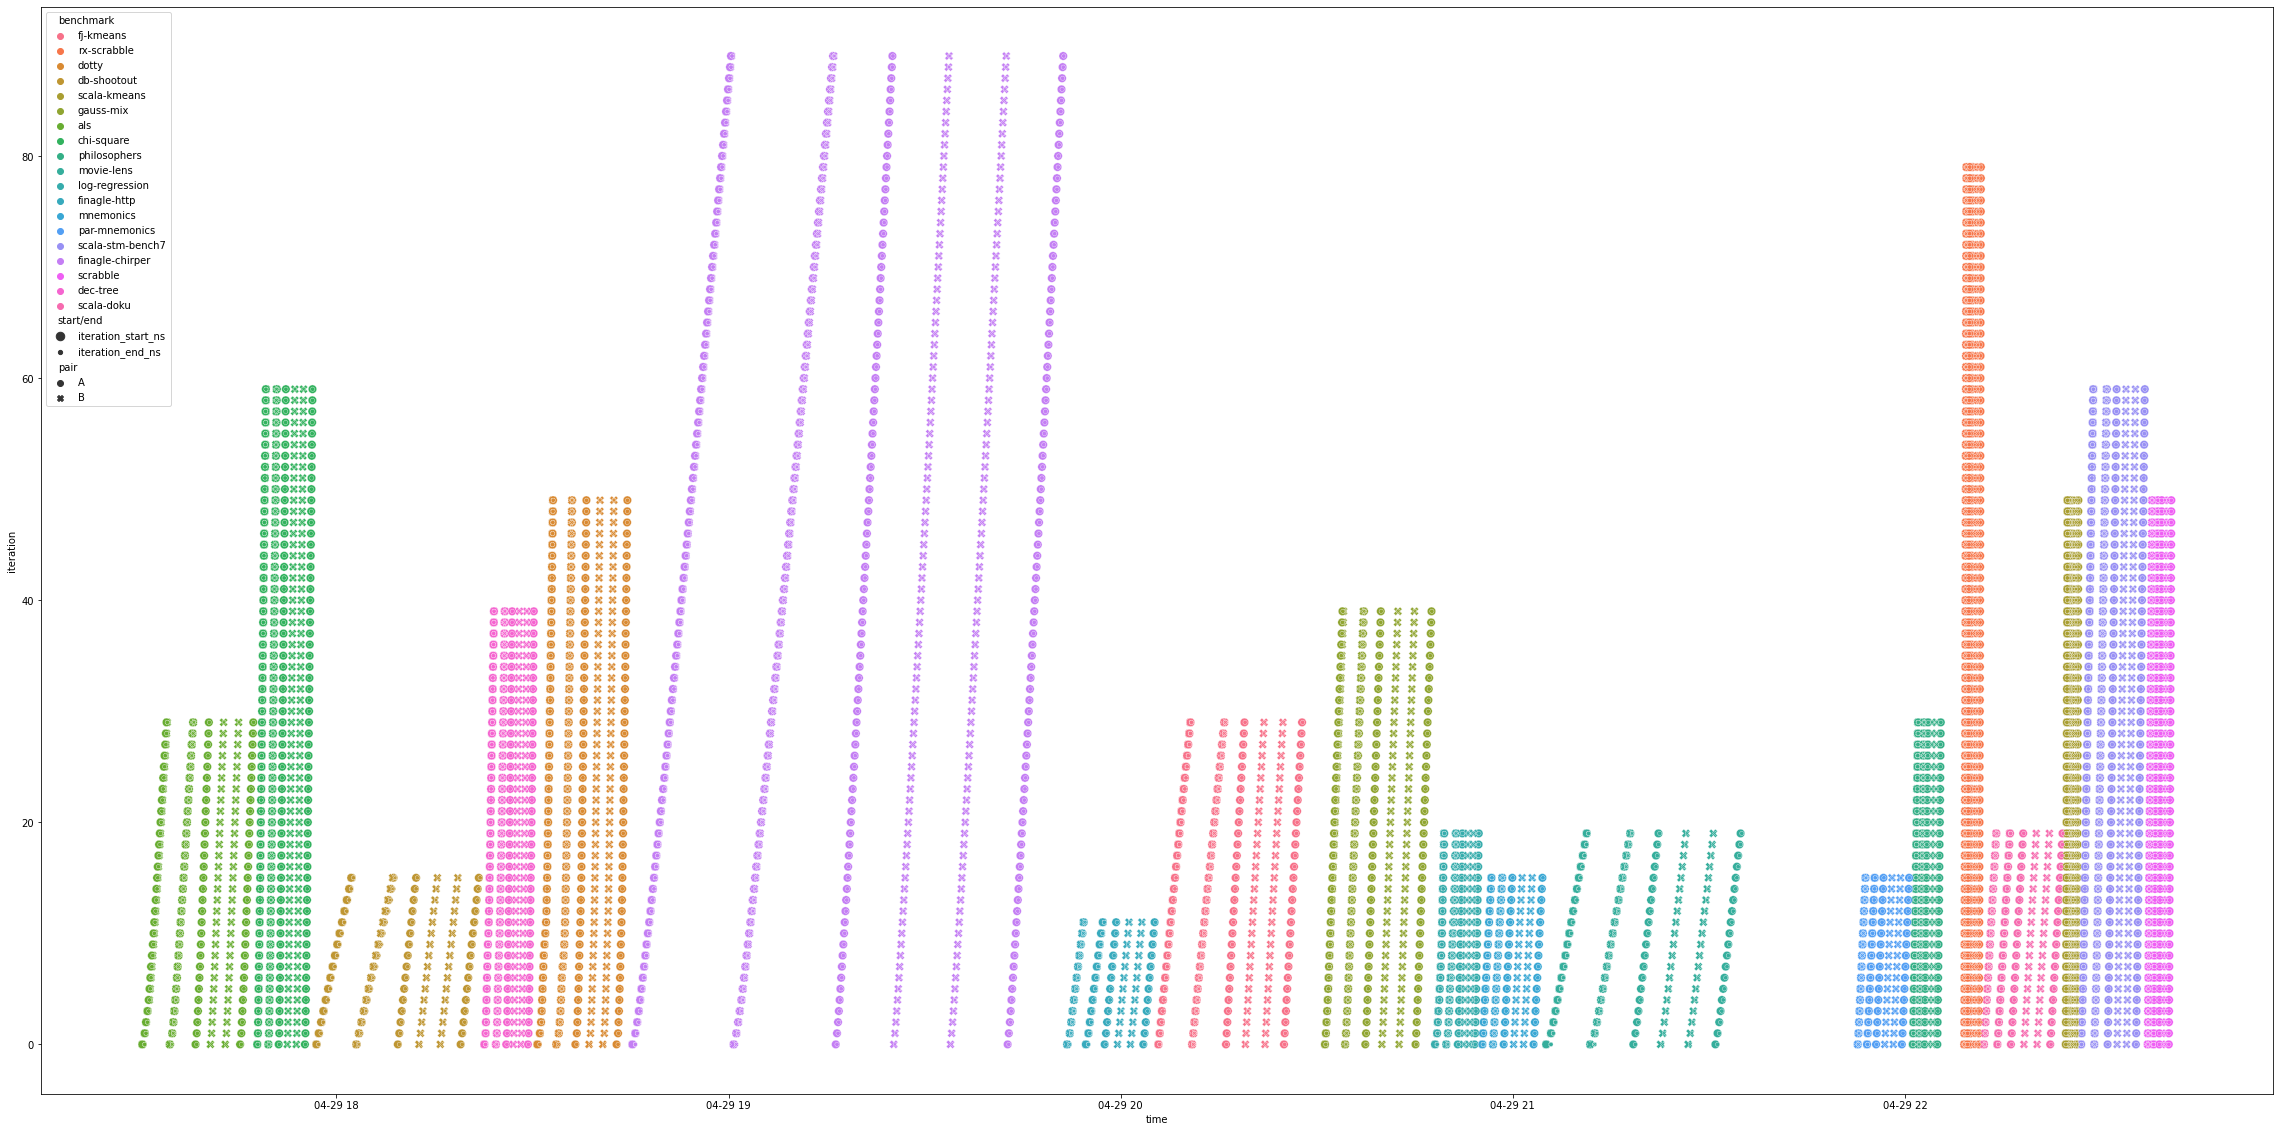

In [24]:
plt.figure(figsize=(40,20))
ax = sns.scatterplot(x="time", y="iteration", hue="benchmark", style="pair", size="start/end",
    data=df_iterations_melt
    # data=df_iterations_melt[df_iterations_melt.benchmark.isin(["chi-square"])]
)


# Run-time analysis

In [25]:
df_duration_runid = (df_iterations
    .groupby(by=["type", "benchmark", "runid"])
    .agg({"iteration_start_ns": "min", "iteration_end_ns": "max",})
    .rename({"iteration_start_ns": "runid_start_ns", "iteration_end_ns": "runid_end_ns"}, axis=1)
    .reset_index()
)

df_duration_runid["runid_duration_ns"] = df_duration_runid["runid_end_ns"] - df_duration_runid["runid_start_ns"]
df_duration_runid

,type,benchmark,runid,runid_start_ns,runid_end_ns,runid_duration_ns
0,duet,als,0,1651253417774000000,1651253650241135300,232467135300
1,duet,als,1,1651253669743000000,1651253891794961900,222051961900
2,duet,chi-square,0,1651254472782000000,1651254555399368900,82617368900
3,duet,chi-square,1,1651254574850000000,1651254653996383500,79146383500
4,duet,db-shootout,0,1651255015690000000,1651255359967144400,344277144400
...,...,...,...,...,...,...
71,sequential,scala-kmeans,1,1651271157244000000,1651271191625272400,34381272400
72,sequential,scala-stm-bench7,0,1651271459988000000,1651271630242341600,170254341600
73,sequential,scala-stm-bench7,1,1651271633798000000,1651271802614179100,168816179100
74,sequential,scrabble,0,1651271933513000000,1651271987509655200,53996655200


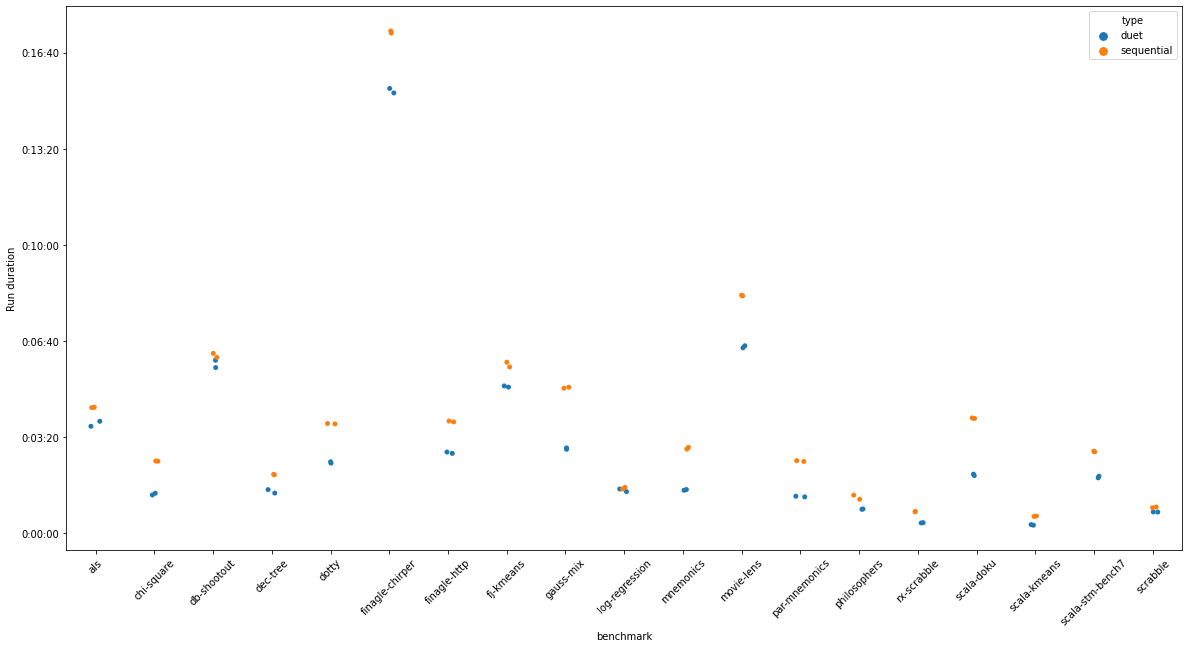

In [26]:
plt.figure(figsize=(20, 10))
ax = sns.stripplot(x="benchmark", y="runid_duration_ns", hue="type", data=df_duration_runid)
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda ns, x: str(timedelta(seconds=ns / NS_PER_S))))
ax.set_ylabel("Run duration")
plt.xticks(rotation=45)
plt.show()

In [27]:
df_duration_benchmark = (df_duration_runid
    .groupby(by=["type", "benchmark"])
    .agg({"runid_duration_ns": "mean"})
    .reset_index()
)
df_duration_benchmark

,type,benchmark,runid_duration_ns
0,duet,als,2.272595e+11
1,duet,chi-square,8.088188e+10
2,duet,db-shootout,3.518757e+11
3,duet,dec-tree,8.658062e+10
4,duet,dotty,1.467703e+11
5,duet,finagle-chirper,9.206634e+11
6,duet,finagle-http,1.670382e+11
7,duet,fj-kmeans,3.047932e+11
8,duet,gauss-mix,1.755873e+11
9,duet,log-regression,8.877182e+10


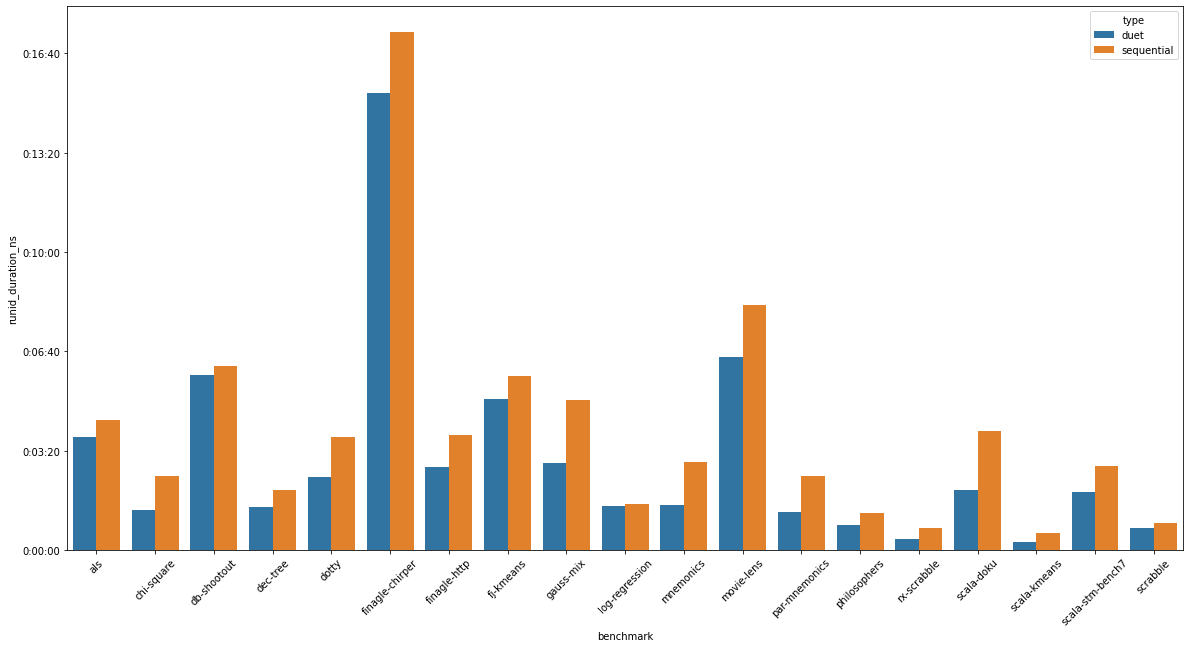

In [28]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="benchmark", y="runid_duration_ns", hue="type", data=df_duration_benchmark)
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda ns, x: str(timedelta(seconds=ns / NS_PER_S))))
plt.xticks(rotation=45)
plt.show()

In [29]:
df_duration_benchmark_pivot = df_duration_benchmark.pivot_table(index="benchmark", values="runid_duration_ns", columns=["type"])
df_duration_benchmark_pivot = df_duration_benchmark_pivot.reset_index()
df_duration_benchmark_pivot["relative"] = df_duration_benchmark_pivot["duet"] / df_duration_benchmark_pivot["sequential"]
df_duration_benchmark_pivot

type,benchmark,duet,sequential,relative
0,als,2.272595e+11,2.612419e+11,0.869920
1,chi-square,8.088188e+10,1.495361e+11,0.540885
2,db-shootout,3.518757e+11,3.696635e+11,0.951881
3,dec-tree,8.658062e+10,1.214747e+11,0.712746
4,dotty,1.467703e+11,2.273692e+11,0.645515
5,finagle-chirper,9.206634e+11,1.042771e+12,0.882901
6,finagle-http,1.670382e+11,2.320285e+11,0.719904
7,fj-kmeans,3.047932e+11,3.505090e+11,0.869573
8,gauss-mix,1.755873e+11,3.023540e+11,0.580734
9,log-regression,8.877182e+10,9.308516e+10,0.953662


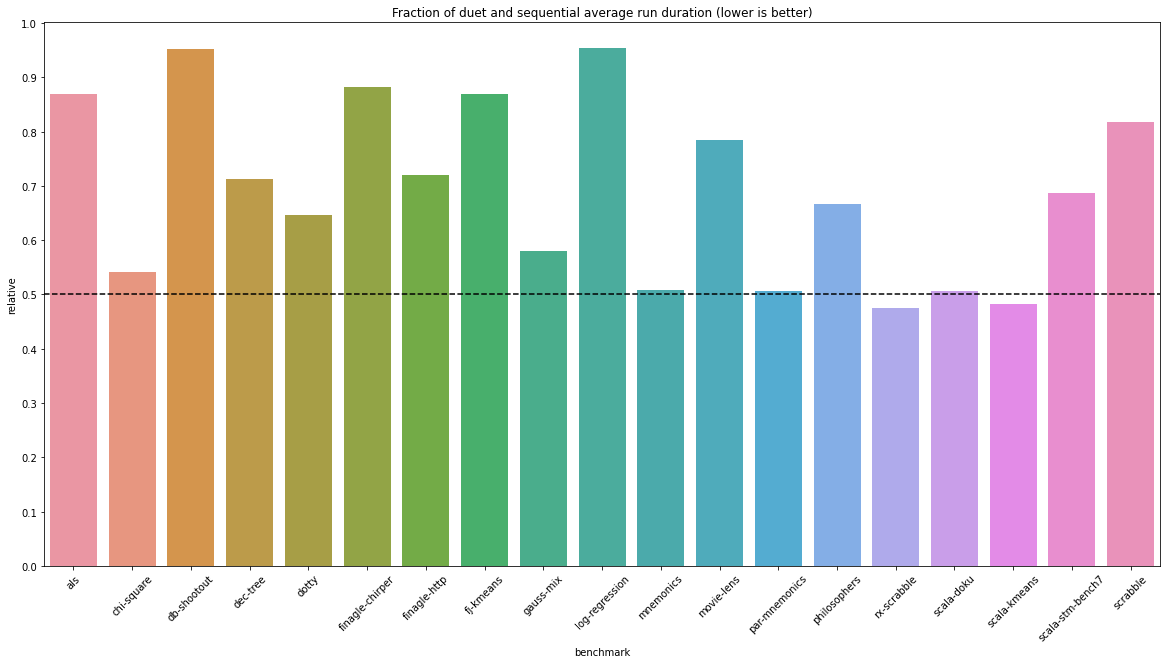

In [30]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="benchmark", y="relative", data=df_duration_benchmark_pivot)
ax.set_title("Fraction of duet and sequential average run duration (lower is better)")
ax.axhline(0.5, linestyle='--', color='k')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(rotation=45)
plt.show()

In [31]:
df_duration_type = (df_duration_runid
    .groupby(by=["type"])
    .agg({"runid_duration_ns": ["mean", "sum"]})
)
runtime_improvement =  df_duration_type["runid_duration_ns"]["mean"].loc["sequential"] / df_duration_type["runid_duration_ns"]["mean"].loc["duet"] - 1
runtime_improvement2 =  1 - df_duration_type["runid_duration_ns"]["mean"].loc["duet"] / df_duration_type["runid_duration_ns"]["mean"].loc["sequential"]
df_duration_type

runid_duration_ns               
                        mean            sum
type                                       
duet            1.827074e+11  6942880933400
sequential      2.413266e+11  9170411215200

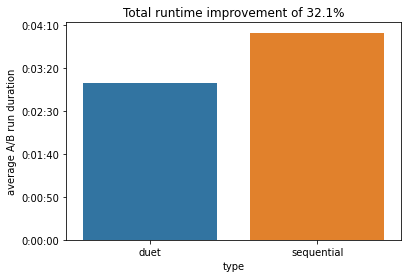

In [32]:
ax = sns.barplot(x=df_duration_type.index, y=df_duration_type["runid_duration_ns", "mean"])
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda ns, x: str(timedelta(seconds=ns/NS_PER_S))))
ax.set_title(f"Total runtime improvement of {(runtime_improvement * 100):.1f}%")
ax.set_ylabel("average A/B run duration")
plt.show()

## Overlapping timeline

In [33]:
df_start_end = df_iterations.pivot_table(index=["benchmark", "runid", "iteration"], columns="pair", values=["iteration_start_ns", "iteration_end_ns"])
df_start_end

iteration_end_ns                       \
pair                                         A                    B   
benchmark runid iteration                                             
als       0     0          1651253678640812032  1651253747257307392   
                1          1651253687220146176  1651253755768094208   
                2          1651253697138398720  1651253765557795840   
                3          1651253704992425472  1651253775761128704   
                4          1651253710759815424  1651253782525003520   
...                                        ...                  ...   
scrabble  1     45         1651271981640635648  1651271968962420224   
                46         1651271982211976960  1651271969565743616   
                47         1651271982821774336  1651271970003633408   
                48         1651271983444567040  1651271970433482240   
                49         1651271984025944064  1651271970914548224   

                            iteration_start_ns                       
pair                                         A                    B  
benchmark runid iteration                                            
als       0     0          1651253662128000000  1651253730430000128  
                1          1651253678640812032  1651253747257307392  
                2          1651253687220146176  1651253755768094208  
                3          1651253697138398720  1651253765557795840  
                4          1651253704992425472  1651253775761128704  
...                                        ...                  ...  
scrabble  1     45         1651271981017592832  1651271968331866624  
                46         1651271981640635648  1651271968962420224  
                47         1651271982211976960  1651271969565743616  
                48         1651271982821774336  1651271970003633408  
                49         1651271983444567040  1651271970433482240  

[1460 rows x 4 columns]

In [34]:
df_duet = df_iterations[df_iterations.type == "duet"]
df_sequential = df_iterations[df_iterations.type == "sequential"]

In [35]:
df_overlap = compute_overlaps(df_duet)
df_overlap["overlap_start_delay_ns_A"] = df_overlap["overlap_start_ns"] - df_overlap["iteration_start_ns_A"]
df_overlap["overlap_start_delay_ns_B"] = df_overlap["overlap_start_ns"] - df_overlap["iteration_start_ns_B"]
df_overlap

,benchmark,runid,type_A,order_A,iteration_A,epoch_start_ms_A,iteration_time_ns_A,iteration_start_ns_A,iteration_end_ns_A,iteration_start_A,...,iteration_start_ns_B,iteration_end_ns_B,iteration_start_B,iteration_end_B,iteration_time_B,overlap_start_ns,overlap_end_ns,overlap_size,overlap_start_delay_ns_A,overlap_start_delay_ns_B
0,fj-kmeans,1,duet,BA,0,1651263055306,10986394100,1651263055306000000,1651263066292394100,2022-04-29 20:10:55.306000000,...,1651263055304000000,1651263066458228800,2022-04-29 20:10:55.304000000,2022-04-29 20:11:06.458228800,0 days 00:00:11.154228800,1651263055306000000,1651263066292394100,10986394100,0,2000000
1,fj-kmeans,1,duet,BA,1,1651263055306,10205578900,1651263066292394100,1651263076497973000,2022-04-29 20:11:06.292394100,...,1651263055304000000,1651263066458228800,2022-04-29 20:10:55.304000000,2022-04-29 20:11:06.458228800,0 days 00:00:11.154228800,1651263066292394100,1651263066458228800,165834700,0,10988394100
2,fj-kmeans,1,duet,BA,1,1651263055306,10205578900,1651263066292394100,1651263076497973000,2022-04-29 20:11:06.292394100,...,1651263066458228800,1651263076652594200,2022-04-29 20:11:06.458228800,2022-04-29 20:11:16.652594200,0 days 00:00:10.194365400,1651263066458228800,1651263076497973000,10039744200,165834700,0
3,fj-kmeans,1,duet,BA,2,1651263055306,9987265000,1651263076497973000,1651263086485238000,2022-04-29 20:11:16.497973000,...,1651263066458228800,1651263076652594200,2022-04-29 20:11:06.458228800,2022-04-29 20:11:16.652594200,0 days 00:00:10.194365400,1651263076497973000,1651263076652594200,154621200,0,10039744200
4,fj-kmeans,1,duet,BA,2,1651263055306,9987265000,1651263076497973000,1651263086485238000,2022-04-29 20:11:16.497973000,...,1651263076652594200,1651263086688879600,2022-04-29 20:11:16.652594200,2022-04-29 20:11:26.688879600,0 days 00:00:10.036285400,1651263076652594200,1651263086485238000,9832643800,154621200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,par-mnemonics,1,duet,BA,13,1651269251060,4442405200,1651269312755755900,1651269317198161100,2022-04-29 21:55:12.755755900,...,1651269312311734600,1651269316828883800,2022-04-29 21:55:12.311734600,2022-04-29 21:55:16.828883800,0 days 00:00:04.517149200,1651269312755755900,1651269316828883800,4073127900,0,444021300
2847,par-mnemonics,1,duet,BA,13,1651269251060,4442405200,1651269312755755900,1651269317198161100,2022-04-29 21:55:12.755755900,...,1651269316828883800,1651269321305300500,2022-04-29 21:55:16.828883800,2022-04-29 21:55:21.305300500,0 days 00:00:04.476416700,1651269316828883800,1651269317198161100,369277300,4073127900,0
2848,par-mnemonics,1,duet,BA,14,1651269251060,4430733500,1651269317198161100,1651269321628894600,2022-04-29 21:55:17.198161100,...,1651269316828883800,1651269321305300500,2022-04-29 21:55:16.828883800,2022-04-29 21:55:21.305300500,0 days 00:00:04.476416700,1651269317198161100,1651269321305300500,4107139400,0,369277300
2849,par-mnemonics,1,duet,BA,14,1651269251060,4430733500,1651269317198161100,1651269321628894600,2022-04-29 21:55:17.198161100,...,1651269321305300500,1651269325772035600,2022-04-29 21:55:21.305300500,2022-04-29 21:55:25.772035600,0 days 00:00:04.466735100,1651269321305300500,1651269321628894600,323594100,4107139400,0


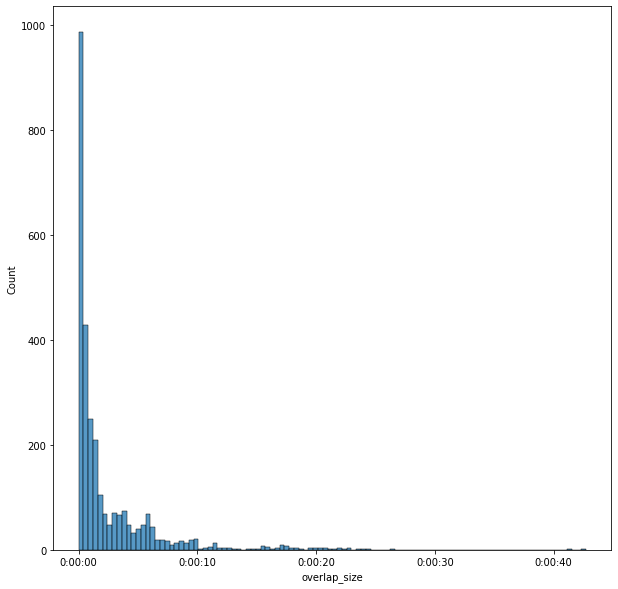

In [36]:
plt.figure(figsize=(10,10))
ax = sns.histplot(x="overlap_size", data=df_overlap)
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda ns, x: str(timedelta(seconds=ns/NS_PER_S))))
plt.show()

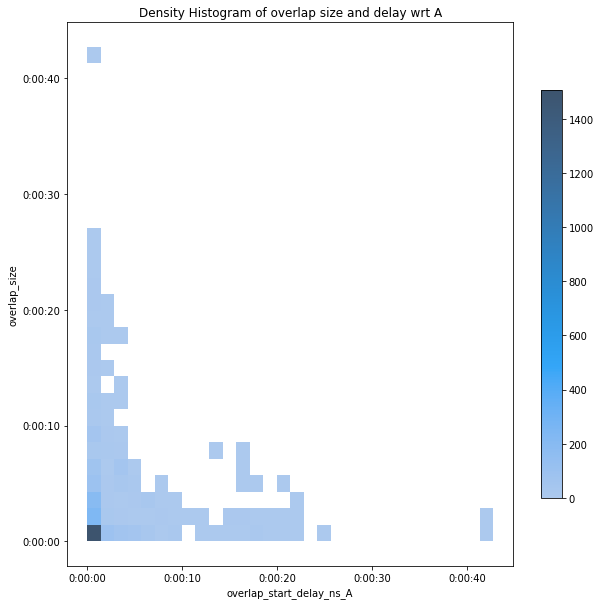

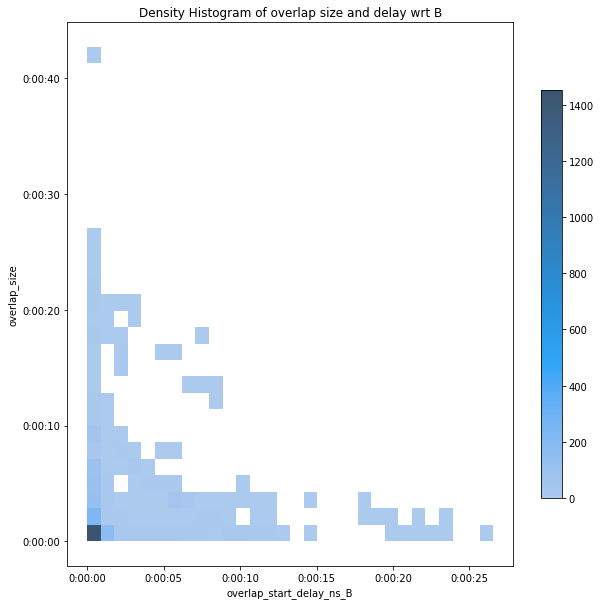

In [37]:
for pair in ["A", "B"]:
    plt.figure(figsize=(10,10))
    ax = sns.histplot(
        x=f"overlap_start_delay_ns_{pair}", y="overlap_size", data=df_overlap,
        bins=30, cbar=True, cbar_kws=dict(shrink=.75)
    )
    ax.set_title(f"Density Histogram of overlap size and delay wrt {pair}")
    ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda ns, x: str(timedelta(seconds=ns/NS_PER_S))))
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda ns, x: str(timedelta(seconds=ns/NS_PER_S))))
    plt.show()

In [38]:
# Other overlap statistics

# Overlap size - proportional
df_overlap["overlap_proportion_A"] = (
    df_overlap["overlap_size"] / df_overlap["iteration_time_ns_A"]
)
df_overlap["overlap_proportion_B"] = (
    df_overlap["overlap_size"] / df_overlap["iteration_time_ns_B"]
)

# Overlap size - proportional
df_overlap["iteration_difference_time_ns"] = (
    df_overlap["iteration_time_ns_A"] - df_overlap["iteration_time_ns_B"]
)

df_overlap["iteration_difference_time_ns_size_weighted"] = (
    df_overlap["iteration_time_ns_A"] - df_overlap["iteration_time_ns_B"]
) * df_overlap["overlap_size"]

df_overlap["iteration_difference_time_ns_proportion_weighted"] = (
    df_overlap["iteration_time_ns_A"] - df_overlap["iteration_time_ns_B"]
) * df_overlap["overlap_proportion_A"]

df_overlap["iteration_difference_time_ns_scaled"] = (
    df_overlap["iteration_time_ns_A"] - df_overlap["iteration_time_ns_B"]
) / df_overlap["iteration_time_ns_A"]
df_overlap["iteration_difference_time_ns_scaled_size_weighted"] = (
    (df_overlap["iteration_time_ns_A"] - df_overlap["iteration_time_ns_B"])
    / df_overlap["iteration_time_ns_A"]
) * df_overlap["overlap_size"]
df_overlap["iteration_difference_time_ns_scaled_proportion_weighted"] = (
    (df_overlap["iteration_time_ns_A"] - df_overlap["iteration_time_ns_B"])
    / df_overlap["iteration_time_ns_A"]
) * df_overlap["overlap_proportion_A"]

In [39]:
df_overlap[
    [
        "iteration_time_ns_A",
        "iteration_time_ns_B",
        "overlap_size",
        "iteration_difference_time_ns",
        "iteration_difference_time_ns_size_weighted",
        "iteration_difference_time_ns_proportion_weighted",
        "iteration_difference_time_ns_scaled_size_weighted",
        "iteration_difference_time_ns_scaled_proportion_weighted",
    ]
].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
iteration_time_ns_A,2851.0,4.719740e+09,5.393947e+09,1.940203e+08,1.103765e+09,1.882037e+09,7.428190e+09,4.432334e+10
iteration_time_ns_B,2851.0,4.709364e+09,5.327173e+09,1.910699e+08,1.042449e+09,1.870196e+09,7.859448e+09,4.272072e+10
overlap_size,2851.0,2.402761e+09,3.885078e+09,5.110000e+04,2.382224e+08,8.210947e+08,3.105472e+09,4.272072e+10
iteration_difference_time_ns,2851.0,1.037602e+07,1.126705e+09,-1.277786e+10,-6.371850e+07,8.969400e+06,1.136018e+08,2.217307e+10
iteration_difference_time_ns_size_weighted,2851.0,1.156751e+16,1.411065e+18,-8.938734e+18,-4.463296e+16,1.224610e+15,1.074558e+17,9.205297e+18
iteration_difference_time_ns_proportion_weighted,2851.0,-7.152518e+06,3.871170e+08,-9.331164e+09,-2.262979e+07,2.342388e+06,4.440696e+07,3.383181e+09
iteration_difference_time_ns_scaled_size_weighted,2851.0,-7.152518e+06,3.871170e+08,-9.331164e+09,-2.262979e+07,2.342388e+06,4.440696e+07,3.383181e+09
iteration_difference_time_ns_scaled_proportion_weighted,2851.0,-1.887191e-03,1.059645e-01,-3.870526e+00,-1.029514e-02,1.260950e-03,1.695503e-02,2.434763e-01


# Speedup evaluation